<a href="https://colab.research.google.com/github/vajiha110/FMML_IIITH_PROJECTS/blob/main/AIML_Module_4_Lab_2(3)_Introduction_to_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent continuation





# Things to try



1.   Change the coefficients array and try a different polynomial instead of our $x^2$.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?
4. Can you modify the algorithm to find a maxima of a function, instead of a minima?



3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of  x2 ?

In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

In [2]:
def eval_5th_degree(coeffs, x):
    """
    Function to return the output of evaluating a fifth-degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, and f for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the fifth-degree polynomial.
    """
    a = coeffs[0] * (x ** 5)
    b = coeffs[1] * (x ** 4)
    c = coeffs[2] * (x ** 3)
    d = coeffs[3] * (x ** 2)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0, 0, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y = eval_5th_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

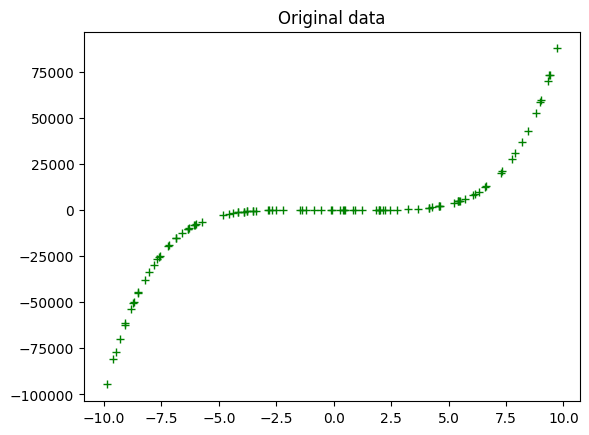

In [3]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

In [4]:
def eval_5th_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a fifth-degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, and f for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the fifth-degree polynomial.
    """
    a = coeffs[0] * (x ** 5)
    b = coeffs[1] * (x ** 4)
    c = coeffs[2] * (x ** 3)
    d = coeffs[3] * (x ** 2)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.uniform(interval_min, interval_max)  # Generate a random number in the specified interval

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y = eval_5th_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)

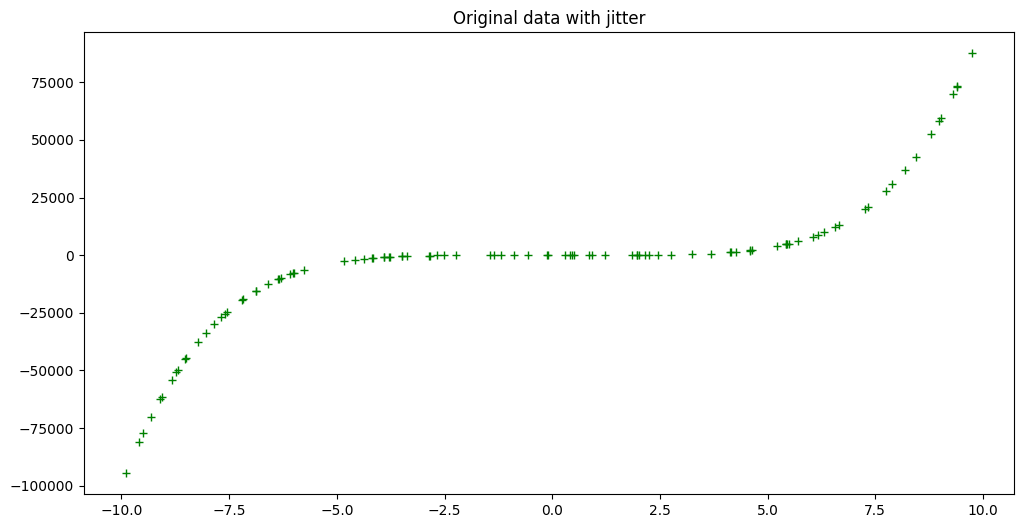

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

In [6]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

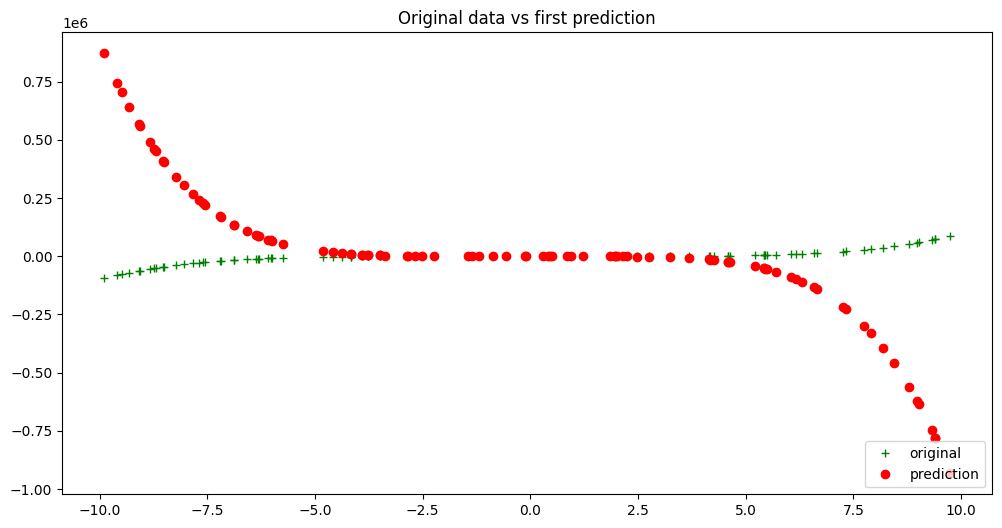

In [7]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10),random.randrange(-10, 10),random.randrange(-10, 10))
y_bar = eval_5th_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [8]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

108670280613.02211

In [9]:
def calc_gradient_5th_poly(coeffs, inputs_x, outputs_y):
    """
    Calculates the gradient for a fifth-degree polynomial.

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, and f for the polynomial.
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the fifth-degree polynomial, as a tuple of its parts for a, b, c, d, e, f respectively.
    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []

    y_bars = eval_5th_degree(coeffs, inputs_x)

    for x, y, y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        x_5 = x ** 5
        x_4 = x ** 4
        x_3 = x ** 3
        x_2 = x ** 2
        x_1 = x
        partial_a = x_5 * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_4 * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x_3 * (y - y_bar)
        c_s.append(partial_c)
        partial_d = x_2 * (y - y_bar)
        d_s.append(partial_d)
        partial_e = x_1 * (y - y_bar)
        e_s.append(partial_e)
        partial_f = (y - y_bar)
        f_s.append(partial_f)

    n = len(y_bars)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(e_s)
    gradient_f = (-2 / n) * sum(f_s)

    return (gradient_a, gradient_b, gradient_c, gradient_d, gradient_e, gradient_f)

In [10]:
calc_grad = calc_gradient_5th_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]
d_new = rand_coeffs[3] - lr * calc_grad[3]
e_new = rand_coeffs[4] - lr * calc_grad[4]
f_new = rand_coeffs[5] - lr * calc_grad[5]

new_model_coeffs = (a_new, b_new, c_new, d_new, e_new, f_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_5th_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (2003059.975839757, -17801.873928917463, 24958.54657513602, -235.30742968206857, 325.41569375076955, -10.074806069362587)
Now have smaller model loss: 3.7249157089872367e+21 vs 108670280613.02211


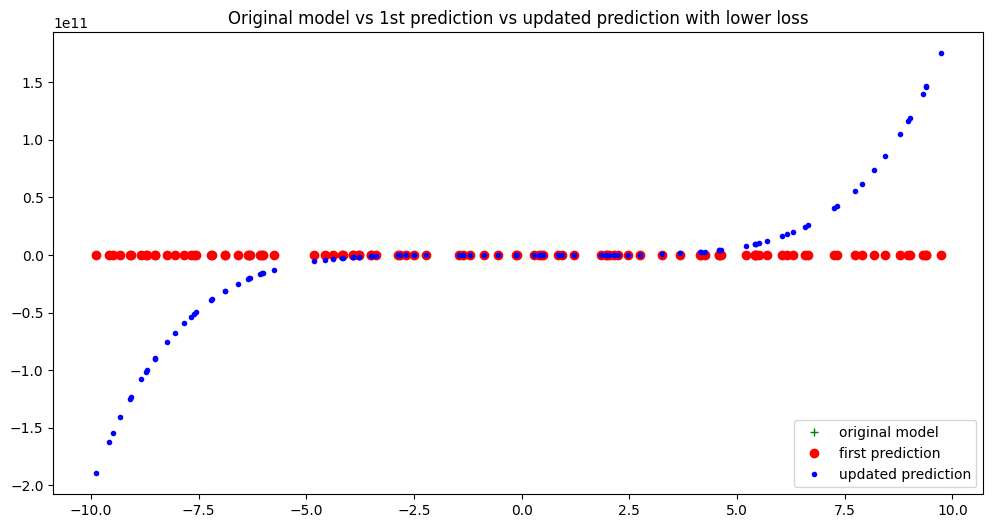

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

In [12]:
def calc_gradient_5th_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    Calculates the gradient for a fifth-degree polynomial.

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, and f for the polynomial.
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the fifth-degree polynomial, as a tuple of its parts for a, b, c, d, e, f respectively.
    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []

    y_bars = eval_5th_degree(coeffs, inputs_x)

    for x, y, y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        x_5 = x ** 5
        x_4 = x ** 4
        x_3 = x ** 3
        x_2 = x ** 2
        x_1 = x
        partial_a = x_5 * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_4 * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x_3 * (y - y_bar)
        c_s.append(partial_c)
        partial_d = x_2 * (y - y_bar)
        d_s.append(partial_d)
        partial_e = x_1 * (y - y_bar)
        e_s.append(partial_e)
        partial_f = (y - y_bar)
        f_s.append(partial_f)

    n = len(y_bars)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(e_s)
    gradient_f = (-2 / n) * sum(f_s)

    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    d_new = coeffs[3] - lr * gradient_d
    e_new = coeffs[4] - lr * gradient_e
    f_new = coeffs[5] - lr * gradient_f

    new_model_coeffs = (a_new, b_new, c_new, d_new, e_new, f_new)


     # update with these new coeffs:
    new_y_bar = eval_5th_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar


In [13]:
def gradient_descent(epochs, lr, init_coeffs):
    """
    Perform gradient descent for a fifth-degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updating loss.
        lr: specified learning rate
        init_coeffs: initial coefficients

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)
    """
    losses = []
    rand_coeffs_to_test = init_coeffs
    for i in range(epochs):
        loss = calc_gradient_5th_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)


In [14]:
# List of different initializations
initializations = [
    [1, -3, 2, 0, -1, -2],
    [1, 3, 2, 0, -1, -2,],
]

# Perform gradient descent for each initialization
for init_coeffs in initializations:
    GD = gradient_descent(30000, 0.001,init_coeffs)



<ipython-input-6-3e15a3826a00>:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-6-3e15a3826a00>:12: RuntimeWarning: overflow encountered in double_scalars
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-12-1a5fc392b63a>:27: RuntimeWarning: overflow encountered in double_scalars
  partial_a = x_5 * (y - y_bar)
<ipython-input-12-1a5fc392b63a>:29: RuntimeWarning: overflow encountered in double_scalars
  partial_b = x_4 * (y - y_bar)
<ipython-input-12-1a5fc392b63a>:43: RuntimeWarning: invalid value encountered in double_scalars
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-12-1a5fc392b63a>:44: RuntimeWarning: overflow encountered in double_scalars
  gradient_c = (-2 / n) * sum(c_s)


[1.8460408959815668e+19, 6.344341190204851e+31, 2.1865390566608543e+44, 7.53577858839408e+56, 2.597161883014842e+69, 8.950966071340904e+81, 3.0848979470348274e+94, 1.0631919803706791e+107, 3.664228789840634e+119, 1.2628549567892527e+132, 4.352355525148712e+144, 1.5000137993245215e+157, 5.16970956339121e+169, 1.7817100737242282e+182, 6.140559247835204e+194, 2.1163077221289e+207, 7.29373041441031e+219, 2.5137413997893964e+232, 8.663462269637532e+244, 2.985811448374179e+257, 1.0290423998828485e+270, 3.5465342640214473e+282, 1.2222922289023339e+295, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

<ipython-input-2-1734dfd78b4a>:19: RuntimeWarning: invalid value encountered in add
  y = a + b + c + d + e + f


[2.2658055572067566e+18, 7.63005507065507e+30, 2.629644575187445e+43, 9.06291575969325e+55, 3.1234807503897575e+68, 1.0764893172069303e+81, 3.7100572811791454e+93, 1.2786494774833402e+106, 4.406790414159847e+118, 1.5187744644883842e+131, 5.234367095313166e+143, 1.803993912797758e+156, 6.217359191955291e+168, 2.1427763723349375e+181, 7.38495306460316e+193, 2.545180751034847e+206, 8.77181614936425e+218, 3.0231549773807784e+231, 1.041912628084957e+244, 3.590890750508054e+256, 1.2375794317594999e+269, 4.2652449108831034e+281, 1.4699916371387734e+294, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

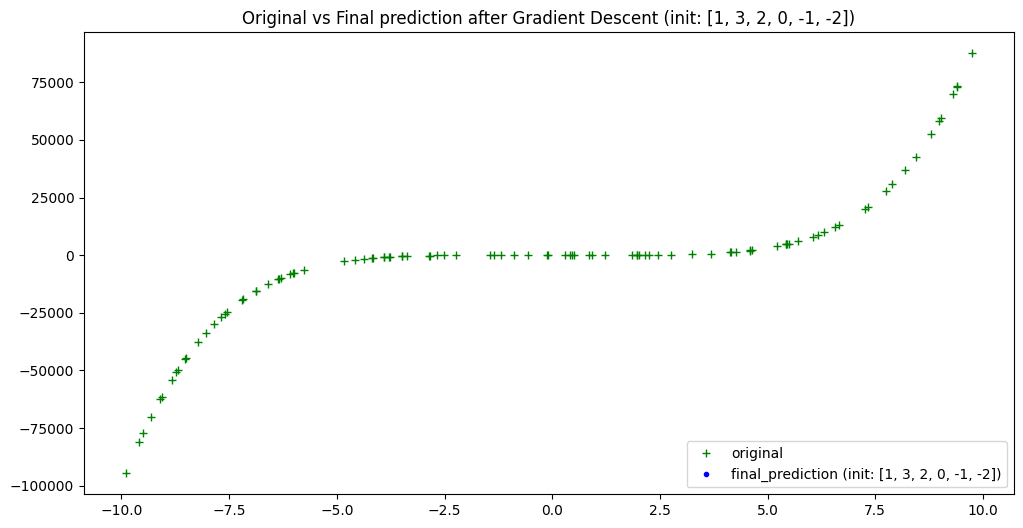

In [15]:
    plt.figure(figsize=(12, 6))
    plt.plot(xs, ys, 'g+', label='original')
    plt.plot(xs, GD[2], 'b.', label=f'final_prediction (init: {init_coeffs})')
    plt.title(f'Original vs Final prediction after Gradient Descent (init: {init_coeffs})')
    plt.legend(loc="lower right")
    plt.show()

In [16]:
  print(f"Final Coefficients predicted (init: {init_coeffs}): {GD[1]}")
  print(f"Original Coefficients: {init_coeffs}")




Final Coefficients predicted (init: [1, 3, 2, 0, -1, -2]): (nan, nan, nan, nan, nan, nan)
Original Coefficients: [1, 3, 2, 0, -1, -2]


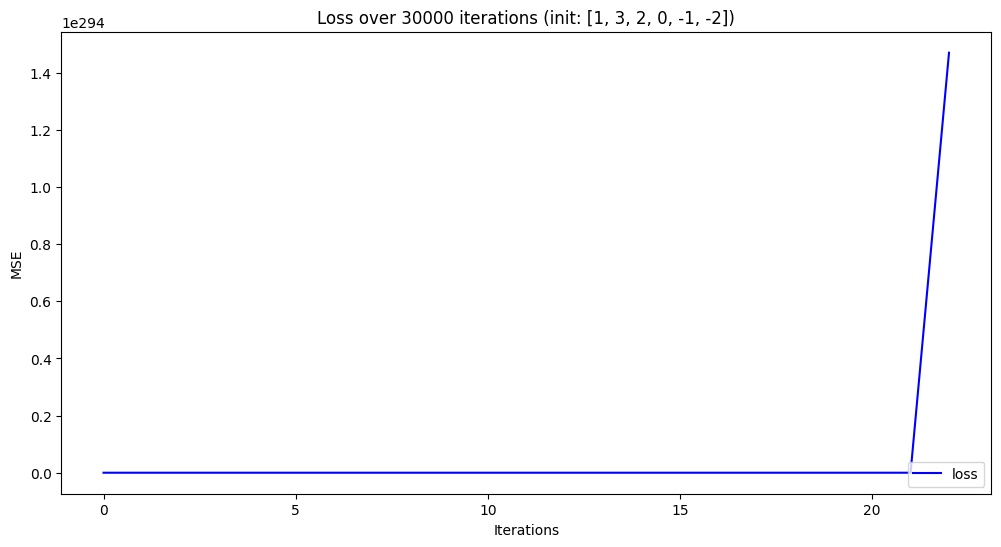

In [17]:
    plt.figure(figsize=(12, 6))
    plt.plot(GD[3], 'b-', label='loss')
    plt.title(f'Loss over 30000 iterations (init: {init_coeffs})')
    plt.legend(loc="lower right")
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.show()